In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

print('Done')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [16]:
vecs = np.load('imagenet_vectors.npy')
labels = [l for l in open('imagenet_labels.txt')]
img_paths = list(map(lambda l: '/home/alex/Downloads/ILSVRC/Data/DET/test/%s' % l.split()[0], labels))
vecs.min(), vecs.max(), labels[:2], img_paths[:2]

(-13.747441291809082,
 31.351245880126953,
 ['ILSVRC2017_test_00000001.JPEG minibus,bullet_train,sunglasses,sunglass,military_uniform\n',
  'ILSVRC2017_test_00000002.JPEG maillot,sunscreen,bikini,miniskirt,hand_blower\n'],
 ['/home/alex/Downloads/ILSVRC/Data/DET/test/ILSVRC2017_test_00000001.JPEG',
  '/home/alex/Downloads/ILSVRC/Data/DET/test/ILSVRC2017_test_00000002.JPEG'])

In [42]:
def demo(metric='euclidean', N = 20):
    knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric=metric)
    knn.fit(vecs)
    
    for i in range(N):
        dsts, nbrs = knn.kneighbors(vecs[np.newaxis, i])

        fig, axes = plt.subplots(1, knn.n_neighbors, figsize=(20, 3))

        for nbr, dst, ax in zip(nbrs[0], dsts[0], axes):
            ax.axis('off')
            img = imread(img_paths[nbr])
            ax.imshow(img)
            ax.set_title('%.3lf' % dst)

        plt.show()

/home/alex/.envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


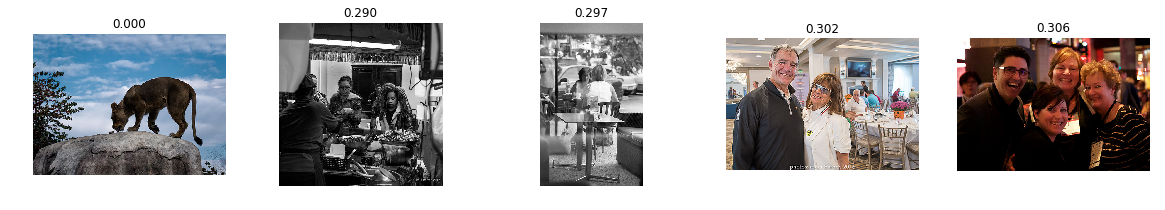

In [ ]:
demo('cosine', 25)